In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from codecarbon import EmissionsTracker
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
hur_df = pd.read_csv("../clean_data/all_hurricane_wo_effects.csv")
print(hur_df.columns)

Index(['Storm_Names', 'Class_Category', 'Max_Winds(kt.)', 'Min_Pressure(mb.)',
       '200-850_hPA Shear(kt.)', 'Sea_Surface_Temp(Celsius)', 'Humidity(%)',
       'Year', 'Months'],
      dtype='object')


In [13]:
features = hur_df[['Min_Pressure(mb.)', 'Humidity(%)', '200-850_hPA Shear(kt.)', 'Sea_Surface_Temp(Celsius)']]
target = hur_df['Max_Winds(kt.)']  # For regression

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Training features shape: (112, 4)
Testing features shape: (28, 4)


In [14]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")


Mean Absolute Error (MAE): 7.735714285714287
R-squared Score: 0.9074438016528925


                     Feature  Importance
0          Min_Pressure(mb.)    0.966198
3  Sea_Surface_Temp(Celsius)    0.015902
2     200-850_hPA Shear(kt.)    0.011246
1                Humidity(%)    0.006654


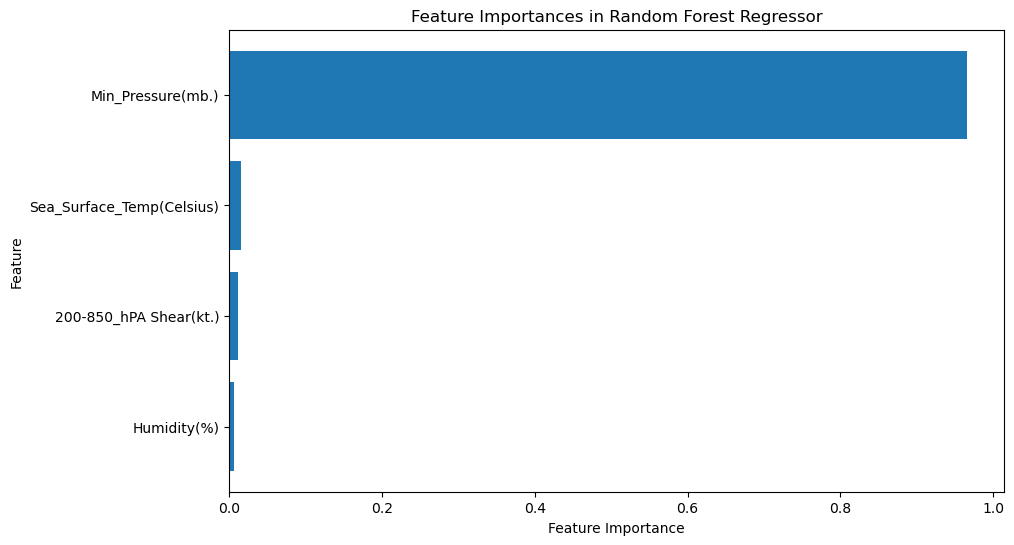

In [15]:
feature_importances = rf_regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.gca().invert_yaxis() 
plt.show()


In [16]:
tracker = EmissionsTracker()
tracker.start()

rf_regressor.fit(X_train, y_train)

emissions = tracker.stop()

print(f"Carbon emissions (kg CO2): {emissions}")

[codecarbon INFO @ 02:19:58] [setup] RAM Tracking...
[codecarbon INFO @ 02:19:58] [setup] GPU Tracking...
[codecarbon INFO @ 02:19:58] No GPU found.
[codecarbon INFO @ 02:19:58] [setup] CPU Tracking...
[codecarbon WARNING @ 02:19:58] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 02:19:58] CPU Model on constant consumption mode: Apple M1 Pro
[codecarbon INFO @ 02:19:58] >>> Tracker's metadata:
[codecarbon INFO @ 02:19:58]   Platform system: macOS-14.4-arm64-arm-64bit
[codecarbon INFO @ 02:19:58]   Python version: 3.12.6
[codecarbon INFO @ 02:19:58]   CodeCarbon version: 2.8.0
[codecarbon INFO @ 02:19:58]   Available RAM : 16.000 GB
[codecarbon INFO @ 02:19:58]   CPU count: 10
[codecarbon INFO @ 02:19:58]   CPU model: Apple M1 Pro
[codecarbon INFO @ 02:19:58]   GPU count: None
[codecarbon INFO @ 02:19:58]   GPU model: None
[codecarbon INFO @ 02:20:02] Saving emissions 

Carbon emissions (kg CO2): 4.28949214074334e-08


In [17]:
target_classification = hur_df['Class_Category']

X_train, X_test, y_train, y_test = train_test_split(features, target_classification, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_class = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)

print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.7142857142857143


In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

dummy_accuracy = accuracy_score(y_test, dummy_pred)
print(f"Dummy Classifier Accuracy (Most Frequent): {dummy_accuracy}")

Dummy Classifier Accuracy (Most Frequent): 0.32142857142857145


In [19]:
print("Model Comparison for Classification:")
print(f"Random Forest Accuracy: {accuracy}")
print(f"Dummy Classifier Accuracy: {dummy_accuracy}")

Model Comparison for Classification:
Random Forest Accuracy: 0.7142857142857143
Dummy Classifier Accuracy: 0.32142857142857145


Due to the Random Forest Accuracy being significantly higher than the Dummy Classifier Accuracy, it is safe to imply that the Random Forest model was effective at learning meaningful patterns in the dataset. 

Dummy essentially captures what the performance would look like if no meaningful patterns were captured. 

My Random Forest uses the features in my dataset (humidity, min_pressure, wind shear, and SST) to identify relationships and predict class category. Additionally, it generalizes well. 

Model can help improve hurricane preparedness by reliably classifying storm categories, enabling better risk assessment and resource allocation. 



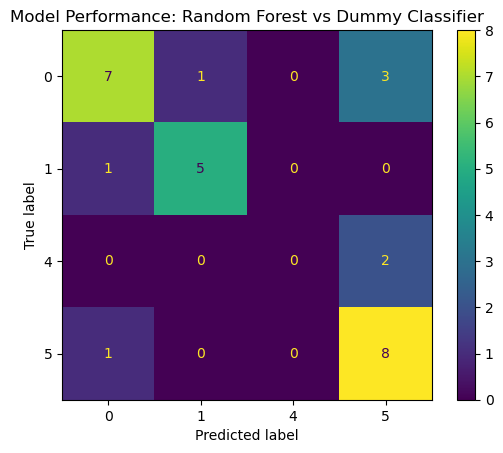

Model Comparison for Classification:
Random Forest Accuracy: 0.7142857142857143
Dummy Classifier Accuracy: 0.32142857142857145


In [20]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf_classifier.fit(X_train, y_train_encoded)

y_pred_encoded = rf_classifier.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_encoded)
plt.title("Model Performance: Random Forest vs Dummy Classifier")
plt.show()

print("Model Comparison for Classification:")
print(f"Random Forest Accuracy: {accuracy}")
print(f"Dummy Classifier Accuracy: {dummy_accuracy}")
